<p style="font-family: Arial; font-size:3.0em;color:purple; font-style:bold"><br>
Python - @dekoratory </p><br>
<p style="font-size:2.0em; font-style:italic">Monika Kubek</p><br>
<p style="font-size:1.4em">18.09.2017 r.</p><br>

Dekorator to konstrukcja, która modyfikuje obiekt wywoływalny taki jak klasa czy funkcja. Bierze on wywoływany obiekt, dodaje mu pewną funkcjonalność, a następnie zwraca go w nowej postaci. Używanie dekoratorów jest bardzo proste, jednak ich tworzenie może nastręczyć wielu trudności. Jest to potężne narzędzie, które nieraz okazuje się bardzo przydatne.

Gdy nasz program staje się coraz bardziej rozbudowany, w pewnym momencie może się okazać, że potrzebujemy zmodyfikować pewne funkcje lub klasy. O ile będzie to tylko jednorazowe działanie, to różne sposoby mogą być efektywne. Jednak jeśli chcemy, żeby nowa funkcjonalność dotyczyła kilku obiektów, to często łatwiej jest po prostu "opakować" je jednym dekoratorem. Dodatkowo składnia dekoratorów pozwala na umieszczanie wyraźnej informacji w jaki sposób obiekt zostanie udekorowany i jak zmieni się jego funkcjonalność. To wyraźnie zwiększa czytelność naszego kodu.

W niniejszym tutoriale opiszę podstawy tworzenia dekoratorów. Wymagana jest jednak wcześniejsza wiedza o funkcjach i klasach w języku Python.

*Python version: 3.5.2*

**Źródła**
* https://www.python-course.eu/python3_decorators.php
* https://www.codementor.io/sheena/introduction-to-decorators-du107vo5c
* https://www.codementor.io/sheena/advanced-use-python-decorators-class-function-du107nxsv
* https://www.python.org/dev/peps/pep-0318/
* https://www.python.org/dev/peps/pep-3129/
* https://krzysztofzuraw.com/blog/2016/python-class-decorators.html
* http://www.rwdev.eu/articles/decorators
* https://www.programiz.com/python-programming/property
* https://wiki.python.org/moin/PythonDecoratorLibrary
* https://python-gtk-3-tutorial.readthedocs.io/en/latest/index.html

# Syntax

Obecna podstawowa składnia dekoratora korzysta ze znaku <font color="purple">@</font>:

In [ ]:
@dek1
def myFunc(*args):
    pass

@dek2
class MyClass:
    pass

co jest równoważne konstrukcji:

In [ ]:
def myFunc(*args):
    pass

class MyClass:
    pass

myFunc = dek1(myFunc(*args))
MyClass = dek2(MyClass)

Sam dekorator jest zaś odpowiednio zbudowaną funkcją lub klasą.

# Dekoratory funkcji
Dekorator bierze funkcję, a następnie zwraca ją w zmodyfikowanej wersji. 

## *Prosty przykład*

In [1]:
def dekorator(func):
    def opakowanie():
        print('Funkcja udekorowana')
        func()
    return opakowanie


def foo():
    print("Foo!")

Funkcja <font color="blue">dekorator</font>() pobiera funkcję jako parametr i zwraca inną funkcję "opakowaną" w sposób zależny od danego parametru. <br>
Udekorujmy zatem funkcję <font color="blue">foo</font>().

In [2]:
bar = dekorator(foo)
bar()

Funkcja udekorowana
Foo!


Powyższa koncepcja przedstawia całą zasadę działania dekoratora. Można ją zapisać w bardziej przejrzystej składni:

In [3]:
@dekorator
def foo():
    print("Foo!")

foo()

Funkcja udekorowana
Foo!


I to tyle! Cała magia dekoratora tkwi właśnie w jego postaci - jest to tak zwany lukier składniowy.

## *Funkcja przyjmuje argument*

In [4]:
def opis(funkcja):
    def opakowanie(a,b):
        print("Zamierzam dzielić", a, "przez", b)
        if b == 0:
            print("Nie można dzielić przez 0!")
            return
        print("wynik to:")
        return funkcja(a, b)
    return opakowanie

@opis
def dzielenie(a, b):
    return a/b

W powyższym przekładzie funkcja <font color="blue">dzielenie</font>() przyjmuje dwa argumenty, które są następnie użyte w dekoratorze.

In [5]:
dzielenie(10,2)

Zamierzam dzielić 10 przez 2
wynik to:


5.0

In [6]:
dzielenie(1,0)

Zamierzam dzielić 1 przez 0
Nie można dzielić przez 0!


## *Dekorator przyjmuje argument*
Kiedy funkcja użyta do dekorowania przyjmuje argumenty, jej konstrukcja robi się bardziej rozbudowana. Staje się ona funkcją fabryki, tworzy ona dekorator i dopiero zwracana przez nią wartość jest właściwym dekoratorem.

In [1]:
def fabryka(n):
    def dekorator(func):
        def opakowanie():
            for i in range(n):
                print("Produkujemy ", i+1)
                func()
            return None
        return opakowanie
    return dekorator

@fabryka(3)
def foo():
    print('bar')

In [8]:
foo()

Produkujemy  1
bar
Produkujemy  2
bar
Produkujemy  3
bar


## *Łączenie dekoratorów*
Do danej funkcji możemy zastosować wiele dekoratorów. Musimy jednak pamiętać o odpowiedniej kolejności.

In [9]:
def star(func):
    def opakowanie():
        print('*' * 21)
        func()
        print('*' * 21)
        return None
    return opakowanie

def plus(func):
    def opakowanie():
        print('+' * 21)
        func()
        print('+' * 21)
        return None
    return opakowanie


@star
@plus
def foo():
    print('foo' * 7)

In [10]:
foo()

*********************
+++++++++++++++++++++
foofoofoofoofoofoofoo
+++++++++++++++++++++
*********************


## *Przykład 1*

Ten prosty trik daje wiele możliwości. Wyobraźmy sobie, że mamy wiele funkcji, które mogą być wywołane przez użytkowników z różnych kont. Wiadomo, że każde konto docelowo powinno mieć dostęp do pewnych funkcji, a innych nie. Co robimy? Wystarczy stworzyć jeden dekorator, który będzie za argument przyjmować rodzaj dostępu i udekorować nim wybrane funkcje. Szybkie, proste i tworzy bardzo przejrzysty kod. 

In [17]:
def wymaga_pozwolenia(pozwolenie): 
    """Funkcja, która pozwala na użycie dekorowanej funkcji tylko użytkownikowi i zadanych uprawnieniach."""
    def dekorator(funkcja):          
        def opakowanie(*args):                            
            listaPozwolen = uzyskaj_pozwolenie(zwroc_ID_uzytkownika())     
            if pozwolenie in listaPozwolen:                       
                return funkcja(*args)                         
            raise Exception("odmowa dostępu")     
        return opakowanie                                       
    return dekorator       


# dwie funkcje pomocnicze
def uzyskaj_pozwolenie(ID_uzytkownika): 
    return ['zalogowany', 'premium']

def zwroc_ID_uzytkownika():       
    return 1
                       
# dekorowane funkcje
@wymaga_pozwolenia('administrator')
def usun_uzytkownika(ID_uzytkownika):
    """Usuwa użytkownika o zadanym ID. Dostępne tylko dla administratora."""
    return "Usunięto użytkownika {}".format(ID_uzytkownika)

@wymaga_pozwolenia('zalogowany')
def nowa_gra():
    """Każdy zalogowany użytkownik może zacząć nową grę."""
    return "nowa gra"
    
@wymaga_pozwolenia('premium')
def usluga_premium():
    """Opcja tylko dla użytkownika premium"""
    return "wykonano usługę premium"

Zobaczmy działanie naszego programu dla zalogowanego użytkownika premium:

In [14]:
usun_uzytkownika(1)

Exception: odmowa dostępu

In [15]:
nowa_gra()

'nowa gra'

In [16]:
usluga_premium()

'wykonano usługę premium'

## *Przykład 2*

Włączanie i wyłączenie dekoratorów za pomocą globalnej flagi.

In [29]:
def wlaczony(funkcja):
    "Ten dekorator nie wpływa na działanie funkcji."
    return funkcja

def wylaczony(funkcja):
    "Ten dekorator wyłącza działanie funkcji i nie robi nic."
    def pusta_funkcja(*args):
        return None
    return pusta_funkcja


GLOBALNA_FLAGA = True
stan = wlaczony if GLOBALNA_FLAGA else wylaczony
@stan
def foo():
    return "funkcja włączona"

GLOBALNA_FLAGA = False
stan = wlaczony if GLOBALNA_FLAGA else wylaczony
@stan
def bar():
    return "funkcja włączona"

# sprawdźmy
print('foo:', foo(), '\nbar:', bar())

foo: funkcja włączona 
bar: None


## *Przykład 3*

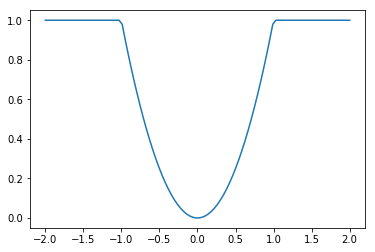

In [11]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline


def dziedzina(a=-1, b=1):
    """
    Dekorator, który ogranicza funkcję do przedziału (a, b), a poza nim pozostawia stałą wartość.
    Domyślnie a=-1 i b=1
    """
    def dekorator(f):
        """Rzeczywisty dekorator"""
        def opakowanie(x):
            y = f(x)
            # sprawdzamy czy argumenty funkcji wychodzą poza wybraną dziedzinę
            if y < a:
                y = a
            elif y > b:
                y = b
            return y
        return opakowanie
    # sprawdzamy czy dekorator zostaje wywołany z argumentami
    if callable(a):  # True jeśli a jest funkcją
        f = a
        a = -1
        # po zastąpieniu a wartością -1 wywołujemy dekorator na funkcji f
        return dekorator(f)
    return dekorator


@dziedzina  # lub @dziedzina(a,b), gdzie a i b to dowolne wartości
def f(x):
    return x**2

x = np.linspace(-2, 2, 100)
y = np.array([f(i) for i in x])

plt.plot(x, y)
plt.show()

# Dekoratory klas

Równie łatwo jak udekorowaliśmy funkcje możemy udekorować metody w klasach.

In [ ]:
class MyClass(object):
    
    @dekorator1
    def __init__(self):
        pass
    @dekorator2
    def func(self):
        pass

W tym momencie warto wspomnieć, że język Python ma wiele dekoratorów, które są już zaimplementowane (np. w module <a href="https://docs.python.org/3.5/library/functools.html">functools</a>). 

W Pythonie mamy trzy rodzaje metod obiektów. Podstawowym rodzajem są metody instancyjne, które jako pierwszy argument przyjmują *self*, który reprezentuje daną instancję klasy. Drugi rodzaj to metody statyczne, które nie operują na instancji, tylko umieszczone są w zasięgu klasy. Tworzy się je dekoratorem <font color="purple">@staticmethod</font>. Trzeci rodzaj to metody klasowe wywoływane na rzecz całej klasy. Tutaj z pomocą przychodzi dekorator <font color="purple">@classmethod</font>. Więcej na ten temat można przeczytać na przykład <a href="http://xion.org.pl/2011/10/03/trzy-rodzaje-metod-w-pythonie/">tutaj</a>.

## *@property* 

In [ ]:
property(fget=None, fset=None, fdel=None, doc=None)

<font color="green">property</font>() jest to wbudowana funkcja, która tworzy i zwraca obiekt *property*. *fget* to funkcja zwracająca wartość atrybutu, *fset* przypisuje wartość, *fdel* usuwa atrybut, a *doc* to na przykład komentarz. Jak widać funkcja ta z racji swojej konstrukcji może być użyta jako dekorator. Staje się ona niezwykle pożyteczna w momencie, gdy w naszej klasie pojawiają się deskryptory. 

Na początek mały przykład. Stwórzmy klasę, która będzie przechowywała informację o wartości temperatury w stopniach Celsjusza. 

In [12]:
class Celsjusz(object):

    def __init__(self, temperatura=0):
        self.temperatura = temperatura

Teraz załóżmy, że nasza klasa stała się popularna i różni użytkownicy implementują ją w swoim kodzie na różne sposoby. Po czasie przypominamy sobie lekcję fizyki, na której powiedziano nam, że przecież temperatura nie może spaść poniżej wartości <a href="https://pl.wikipedia.org/wiki/Zero_bezwzgl%C4%99dne">zera bezwględnego</a>! Rozbudujmy więc nieco naszą klasę.

In [13]:
class Celsjusz(object):
    
    def __init__(self, temperatura=0):
        self.set_temperatura(temperatura)
    
    def get_temperatura(self):
        return self.__temperatura
    
    def set_temperatura(self, wartosc):
        if wartosc < -273.15:
            raise ValueError("Temperatura poniżej -273.15C jest niemożliwa!")
        else:
            self.__temperatura = wartosc

Jak widzimy, nasza klasa wygląda teraz znacznie lepiej. Pojawiły się setter i getter, a temperatura stała się zmienną prywatną klasy. My się cieszymy, ale co z innymi użytkownikami, którzy implementowali naszą klasę w swoim kodzie? Okazuje się, że nowa forma nie jest wstecznie kompatybilna. Teraz wszyscy musieliby zmieniać swój kod tak, żeby nowe metody działały. Dla instancji

In [19]:
c = Celsjusz(69)

wcześniej funkcjonujące

In [20]:
c.temperatura
c.temperatura = 96

AttributeError: 'Celsjusz' object has no attribute 'temperatura'

trzeba zastąpić

In [21]:
print(c.get_temperatura())
c.set_temperatura(96)
print(c.get_temperatura())

69
96


Można sobie z tym problemem w sprytny sposób poradzić, tworząc z *temperatura* obiekt property.

In [22]:
class Celsjusz(object):
    # wcześniejsza metoda
    def __init__(self, temperatura=0):
        self.temperatura = temperatura

    # nowe metody
    def get_temperatura(self):
        return self.__temperatura

    def set_temperatura(self, wartosc):
        if wartosc < -273.15:
            raise ValueError("Temperatura poniżej -273.15C jest niemożliwa!")
        else:
            self.__temperatura = wartosc

    temperature = property(get_temperatura,set_temperatura)

Voilà! Mamy kod, który posiada nowe właściwości, a także jest wstecznie kompatybilny. Jak to działa? Każdy obiekt, który będzie przypisywał (pobierał) wartość obiektowi *temperatura* będzie automatycznie wywoływał funkcję *set_temperatura* (*get_temperatura*). Dzieje się to już podczas inicjowania klasy w kontruktorze.

A wszystko to można ubrać ładnie w dekorator:

In [23]:
class Celsjusz(object):

    def __init__(self, temperatura):
        self.temperatura = temperatura

    def do_fahrenheit(self):
        return (self.temperatura * 1.8) + 32
    
    @property  # getter
    def temperatura(self):
        return self.__temperatura
    
    @temperatura.setter
    def temperatura(self, wartosc):
        if wartosc < -273.15:
            raise ValueError("Temperatura poniżej -273.15C jest niemożliwa!")
        else:
            self.__temperatura = wartosc

Inny przykład:

In [24]:
import numpy as np


class Katy(object):
    """
    Klasa kątów.
    klasa.rad przechowuje wartość kąta w radianach
    klasa.deg przechowuje wartość kąta w stopniach
    """
    
    def __init__(self):
        self.__rad = np.array([0.])
        
    @property
    def rad(self):
        return self.__rad
    
    @rad.setter
    def rad(self, katy_rad):
        self.__rad = katy_rad

    @property
    def deg(self):
        return np.rad2deg(self.__rad)

    @deg.setter
    def deg(self, katy_deg):
        self.__rad = np.deg2rad(katy_deg)


k = Katy()  # tworzymy instancję klasy

k.rad = 0.5  # przypisujemy wartość kąta w radianach

print(k.rad)
print(k.deg, '\n')  # zostaje także podana wartość w stopniach

k.deg = 15  # przypisujemy wartość w stopniach
print(k.deg)
print(k.rad)  # wartość w radianach została od razu przeliczona na nową

0.5
28.6478897565 

15.0
0.261799387799


## *Dekoratory całych klas*

Nie tylko dekorujemy funkcje, ale też całe klasy.

In [25]:
def dekorator_klasy(funkcja):
    def opakowanie(klasa):
        if not '__call__' in klasa.__dict__:
            klasa.__call__ = funkcja
        return klasa
    return opakowanie


@dekorator_klasy(lambda self, arg: print(arg))
class MojaKlasa(object):
    pass


klasa = MojaKlasa()
klasa('tekst')

tekst


Napiszmy teraz prosty program gtk, który będzie kończył działanie po zamknieciu dowolnego okna. Stworzymy dekorator klasy, który podepnie funkcję zamknij do wszystkich obiektów gtk.Window zdefiniowanych w konstruktorze. Dodatkowo stworzymy własną klasę dziedziczącą po gtk.Window, którą udekorujemy tak, aby okno zawsze było ponad innymi.

In [ ]:
import gi
gi.require_version("Gtk", "3.0")
from gi.repository import Gtk as gtk


def zamkniecie(klasa):
    """Dekorator przypisujący funkcję zamknięcia do wszystkich okien w konstruktorze klasy."""
    init = klasa.__init__
    def nowy_init(self):
        init(self)
        slownik = self.__dict__
        okna = [key for key in slownik.keys() if isinstance(slownik[key], gtk.Window)]
        for okno in okna:
            slownik[okno].connect('delete-event', lambda *args: gtk.main_quit())
    klasa.__init__ = nowy_init
    return klasa

def zawsze_na_gorze(klasa):
    """
    Dekorator, który do dekorowanego okna dodaje właściwość 'zawsze na górze'.
    Okno to będzie stale ponad innymi oknami.
    """
    init = klasa.__init__
    def nowy_init(self):
        init(self)
        self.set_keep_above(True)
    klasa.__init__ = nowy_init
    return klasa


@zawsze_na_gorze
class MojeOkno(gtk.Window):
    """Moje własne okno."""
    def __init__(self, tytul="Na górze"):
        gtk.Window.__init__(self, title=tytul)

@zamkniecie
class Glowny(object):
    """Główny program, który w konstruktorze otwiera wszystkie okna."""
    def __init__(self):
        self.okno1 = gtk.Window(title='Okno Główne 1')
        self.okno1.show_all()
        self.okno2 = gtk.Window(title='Okno Główne 2')
        self.okno2.show_all()
        self.okno3 = MojeOkno()
        self.okno3.show_all()


Glowny()
gtk.main()

Na koniec jeszcze jeden prosty przykład.

In [27]:
def dekorator(klasa):
    class Opakowanie(object):
        def __init__(self, *args):
            self.opakowanie = klasa(*args)
        def __getattr__(self, zmienna):
            print('Bierzemy wartość {} z {}'.format(zmienna, self.opakowanie))
            return getattr(self.opakowanie, zmienna)
    return Opakowanie


@dekorator
class Punkt(object):
    """Klasa, która jest punktem."""
    def __init__(self, x, y):
        self.x = x
        self.y = y

        
x = Punkt(1,2)
print(x.x)
print(x.y)

Bierzemy wartość x z <__main__.Punkt object at 0x7fe5f6f8bda0>
1
Bierzemy wartość y z <__main__.Punkt object at 0x7fe5f6f8bda0>
2


# Klasy jako dekoratory

Dekoratory to nie tylko funkcje. Użycie klasy jako dekoratora stwarza wiele więcej możliwości.

## *Przykład 1*

In [19]:
class dekorator(object):
    """Ta klasa jest dekoratorem."""
    def __init__(self, funkcja):
        self.funkcja = funkcja
        
    def __call__(self):
        """
        Funkcja __call__ sprawia, że klasa jest obiektem wywoływalnym.
        Jest to kluczowe przy tworzeniu dekoratora.
        """
        print("Dekoruję", self.funkcja.__name__)
        self.funkcja()

@dekorator
def foo():
    print("Foo!")

foo()

Dekoruję foo
Foo!


## *Przykład 2*

In [31]:
class SprawdzZalogowanie(object):
    """
    Ten dekorator sprawdza czy użytkownik się zalogował, jeśli:
    tak - wywołuje funkcję
    nie - wywołuje funkcję alternatywną 'brak_zalogowania'
    """
    def __init__(self, funkcja):
        self.__funkcja = funkcja

    def __call__(self, *args):
        status = sprawdz_zalogowanie()
        if status is 1:
            return self.__funkcja(*args)
        else:
            return brak_zalogowania()

        
def sprawdz_zalogowanie():
    return test

def brak_zalogowania():
    return 'Przepraszamy - nie jesteś zalogowany!'

@SprawdzZalogowanie
def wyswietl_moje_konto():
    return 'To jest twoje konto'


# sprawdzamy działanie
test = 1
print('zalogowany:\t', wyswietl_moje_konto())
test = 0
print('niezalogowany:\t', wyswietl_moje_konto())

zalogowany:	 To jest twoje konto
niezalogowany:	 Przepraszamy - nie jesteś zalogowany!


## *Przykład 3*

In [36]:
class Memo(dict):
    """
    Dekorator który dziedziczy po słowniku. 
    Po każdym wywołaniu funkcji tworzy nową pozycję w słowniku:
    klucz - argumenty użyte podczas wywołania funkcji
    wartość - przechowuje wynik jaki zwraca funkcja
    """
    def __init__(self, funkcja):
        self.funkcja = funkcja

    def __call__(self, *args):
        return self[args]

    def __missing__(self, klucze):
        wynik = self[klucze] = self.funkcja(*klucze)
        return wynik

@Memo
def foo(a, b):
    return a * b

# sprawdźmy działanie

In [37]:
foo(2, 5)

10

In [38]:
foo('foo', 4)

'foofoofoofoo'

In [39]:
foo

{(2, 5): 10, ('foo', 4): 'foofoofoofoo'}

# Podsumowanie

Powyższe przykłady pozwalają zapoznać się z tematem @dekoratorów. Jest to zaledwie wstęp, ale daje on jednak pomysły na wykorzystanie możliwości tej konstrukcji we własnej pracy. 